## 5-1. 인공지능과 가위바위보 하기

**간단한 이미지 분류기**

안녕하세요. 이번 시간에는 이미지를 분류하는 간단한 인공지능을 만들어 볼 예정입니다. 이번 코스를 진행하고 나면, 여러분들은 숫자 손글씨를 인식할 수도 있고요. 가위바위보 게임을 만들어 볼 수도 있습니다. 숫자는 0~9까지 총 10개의 클래스(class)만 인식을 하면 되고, 가위바위보는 총 3개의 클래스만 구분을 해내면 되죠. 이렇게 클래스가 몇 개 안되는 경우, 인공지능은 간단하게 이미지를 분류해 낼 수 있습니다.

Q1.자, 그러면 실제 생활에서 만나볼 수 있는 간단한 이미지 분류기는 어떤 것이 있을까요? 다른 사용 예를 자유롭게 적어봅시다.(단, 클래스 개수는 10개 이하)
어떤 것이 떠오르시나요? 강아지 품종 분류기, 과일 종류 분류기, 남녀 이미지의 성별 분류기, 의료영상 암세포 양성/음성 분류기 등등, 정말 다양한 사용 예를 생각해 볼 수 있을 것 같습니다.

**숫자 손글씨 인식기 만들기(Sequential Model을 이용하는 방법)**

**어떻게 만들지?** 일반적으로 딥러닝 기술은 **"데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)**의 순서대로 만들게 됩니다. 우리도 이 과정을 따를 거예요.

숫자 손글씨 분류기는 손으로 쓴 숫자 이미지를 입력으로 받으면, 그 이미지가 어떤 숫자를 나타내는지 출력해 낼 수 있습니다. 위 그림에서 보면, 숫자 0에 해당하는 이미지가 입력으로 들어오면 숫자 0을 출력으로, 숫자 5에 해당하는 이미지가 입력으로 들어오면 숫자 5를 출력으로 내보내고 있습니다. 우리는 딥러닝 기술을 이용해서 이런 숫자 손글씨 분류기를 만들 거예요.

# 5-2. 데이터를 준비하자!

**MNIST 숫자 손글씨 Dataset 불러들이기**

오늘은 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용하여 손글씨 인식기를 만들 거예요. 구글(Google)에서 오픈소스로 제공하는 텐서플로우는 가능 널리 사용되고 있는 머신러닝 라이브러리 중 하나입니다. 앞으로 딥러닝 구현 실습은 Tensorflow 버전 2.6.0에서 진행될 예정입니다.

자, 그럼 TF 2.6.0이 설치된 환경에서 먼저 다음의 코드를 실행해 봅시다. 앞으로 보게 될 코드의 구체적인 의미와 메커니즘은 이후에 더 자세하게 배우게 될 테니, 지금은 완벽하게 이해하지 못하더라도 마음 편하게 실행해 보세요.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__) # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train)) # x_train 배열의 크기를 출력

2.8.2
11501568/11490434 [==============================] - 0s 0us/step
60000


위 코드를 실행하면 숫자 손글씨 데이터베이스인 MNIST 데이터셋을 읽을 수 있습니다. MNIST 데이터셋은 Yann Lecun 교수님이 공개한 데이터로서, 아래 페이지에 방문하면 자세한 내용을 확인할 수 있습니다.

참고문헌 [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

Q2. 숫자 손글씨 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요. 28x28

Q3. MNIST dataset에는 총 몇 장의 손글씨 이미지가 있을까요?
70000장, 60000장의 training set과 10000장의 test set으로 구성

Q4. 학습용 데이터(trainings set)은 대략 몇 명의 손글씨가 들어있을까요? 250명


자, 한번 불러들인 숫자 손글씨 이미지 하나를 출력해볼까요? MNIST 데이터셋의 X항목(위 코드에서는 x_train,x_test)은 이미지 데이터를 담은 행렬(matrix)입니다.

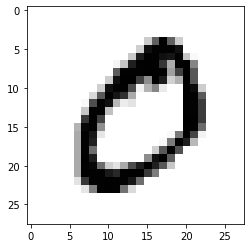

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

숫자 0 이미지가 나왔나요? 주의할 것은, x_train[1]에 담긴 이미지는 x_train 행렬의 1번째가 아니라 2번째 이미지라는 점입니다. 1번째 이미지는 x_train[0]에 담겨 있습니다.

그렇다면 Y항목에는 어떤 값이 들어 있을까요? y_train 행렬의 2번째 값을 확인해 봅시다.

In [ ]:
print(y_train[1])

0


네, Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있는 것을 확인하실 수 있습니다.

그럼 이번에는 또 다른 이미지를 출력해볼까요?

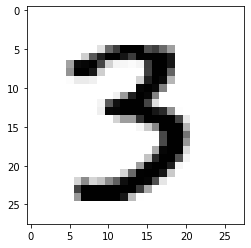

10001 번째 이미지의 숫자는 바로  3 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

**참고: Matplotlib 이란?**
파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공합니다.
어떤 유용한 기능이 제공되는 Matplotlib 공식홈페이지에서 제공하는 다양한 활용 예제들을 통해 직접 확인해 보세요.

[Matplotlib 활용사례 보기](https://https://matplotlib.org/cheatsheets/)

**학습용 데이터와 시험용 데이터**

위 코드를 다시 살펴봅시다.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist.load() 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나우어서 받아들이는 것을 볼 수 있는데요.

우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시킵니다. 학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인해보고 싶을 텐데요, 이 때 시험용 데이터 (x_test, y_test)로 테스트를 할 수 있습니다.

MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 가지고 있습니다. 그 중 250여명의 데이터가 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용됩니다.

자 그러면 우리가 불러들인 학습용 데이터는 과연 몇 장일까요? 아래 코드를 실행시켜 봅시다.

In [ ]:
print(x_train.shape)

(60000, 28, 28)


아마도 (60000,28,28) 이라는 값을 보실 수 있을 겁니다. 이것은 28x28 크기의 숫자 이미지가 60,000장이 있다는 뜻인데요. 마찬가지로 시험용 데이터의 개수를 확인하고 싶다면 아래 코드를 실행하면 됩니다.

In [ ]:
print(x_test.shape)

(10000, 28, 28)


10,000장의 시험용 데이터가 저장되어 있음을 알 수 있습니다. 아래 참고 자료를 읽어보시면 학습용 데이터, 검증용 데이터 그리고 시험용 데이터의 의미와 그 차이점을 보다 자세히 파악할 수 있습니다.

[학습용 데이터, 검증용 데이터, 시험용 데이터](https://ganghee-lee.tistory.com/38)

Q5. 언제 검증용 데이터(validation set)를 사용하나요? 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때

Q6. 교차 검증(cross validation) 기법을 옆 친구와 서로 토론하며 이해해봅시다.

**데이터 전처리 하기**

숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가집니다. 한번 확인해 볼까요?

In [ ]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))

최소값: 0 최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누어주면 됩니다. 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.

In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 5-3. 딥러닝 네트워크 설계하기

**Sequential Model을 사용해 보자**

데이터가 모두 준비가 되었다면 이제는 딥러닝 네트워크를 만들어야 합니다. 이번 수업에서는 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용할 겁니다. Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법입니다. 여러분들은 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있습니다.

케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functional API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등 여러 방법이 있습니다. 공부하면서 하나씩 뱁워나갈 테니 걱정 마세요 :)

이번 수업의 목적은 여러분들에게 딥러닝 네트워크의 모든 것을 가르치는 것이 아닙니다. 빠르게 다양한 응용 예들을 접해보고, 주어진 코드를 다른 데이터에 활용을 해보는 경험을 전달해 드리는 것이 그 목적입니다. 따라서 코드의 내용이 당장 이해가 안가더라도 부담가지지 않으셔도 됩니다. 최대한 이해를 하려 노력은 하되, 프로그램 수행 결과에서 재미를 느끼는 것이 무엇보다도 중요합니다.

다음의 코드는 tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예입니다. 8줄밖에 안되는 간단한 코드이지만, 손글씨 숫자 분류기를 구현하는 데는 충분합니다.

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


이런 간단한 코드만으로도 숫자 손글씨를 인식해 낼 수 있다면, IOT 농장에서 귤이 잘 익었는지 아닌지 판단하거나, 사진 속 인물이 웃고 있는지 무표정인지 파악을 하는 것도 어렵지 않을 겁니다. 코드의 간단한 의미는 다음과 같습니다.

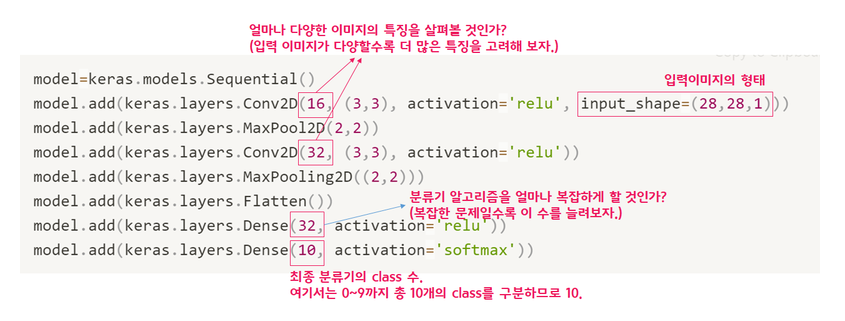

- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려
하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우
에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.

- Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자입니다. 이 값이 클수록보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.

- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

5번째 스텝인 *얼마나 잘 만들었는지 확인하기*에서 이 코드를 수정해 볼 것입니다. 지금은 일단 실행하는 데 초점을 맞춥시다. 우리가 만든 딥러닝 네트워크 모델을 확인해 보려면, model.summary() 메소드를 이용하면 됩니다. 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

# 5-4. 딥러닝 네트워크 학습시키기

우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)와 같은 형태를 가집니다. 이전 스텝에서 첫 번째 레이어에 input shape=(28,28,1)로 지정했던 것을 기억하시나요? 그런데 print(x_train.shpae)을 해보면, (60000, 28, 28)로 채널수에 대한 정보가 없습니다. 따라서 (60000, 28, 28, 1)로 만들어 주어야 합니다 (여기서 채널수 1은 흑백 이미지를 의미합니다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이겠죠?).

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1) # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape = x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape = x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape = x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape = x_test_reshaped shape: (10000, 28, 28, 1)


그러면 이제 x_train 학습 데이터로 딥러닝 네트워크를 학습시켜 봅시다. 여기서 epochs=10은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻입니다. 물론 model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용되어야겠죠. 자 그러면 코드를 실행해 봅시다.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1935 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0497 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0274 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0200 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 34s 18m

각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다. 인식 정확도가 0.94에서 0.99까지 높게 올라가는군요. 9 epoch정도부터는 인식률의 상승이 미미합니다. 10 epoch정도 학습을 시키면 충분할 것 같네요.(학습할 때마다 인식 정확도는 변동됩니다.)

# 5-5. 얼마나 잘 만들었는지 확인하기

**테스트 데이터로 성능을 확인해 보자**

사실 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것입니다. 즉, 연습문제를 잘푸는 인공지능을 만든 거죠. 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있을까요? 자 그러면 시험용 데이터(x_test)를 가지고 확인해 봅시다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0364 - accuracy: 0.9890 - 2s/epoch - 7ms/step
test_loss: 0.03643748164176941
test_accuracy: 0.9890000224113464


결과가 어떻게 나오나요? 99.57점을 받을 줄 알았는데, 98.96로 시험점수가 소폭 하락했네요. (학습할 때마다 test_loss, test_accuracy도 변동됩니다.) 역시 연습문제보다 실제 시험문제가 더 어려운가 봅니다. 위 MNIST 데이터셋 참고문헌을 보시면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있습니다. 즉, 한번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높습니다. 어찌 보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일이었습니다.

**어떤 데이터를 잘못 추촌했을까? 눈으로 확인해 보자**

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수입니다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

In [ ]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0 # 1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.1732630e-09 1.7591008e-09 3.8695902e-08 3.7149729e-08 2.1389406e-11
 3.6645800e-10 2.2768902e-15 9.9999940e-01 4.7036641e-10 5.4358230e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


model.predict() 결과가 [9.5208375e-15 2.8931768e-11 1.2696462e-09 2.0265421e-08 6.1321614e-11 2.9599554e-12 1.0710074e-15 1.0000000e+00 1.0549885e-11 3.8589491e-08] 와 같이 벡터 형태로 나왔나요? 이 벡터는 model이 추론한 결과가 각각 0,1,2,...,7,8,9일 확률을 의미합니다.

이 경우라면 model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 됩니다.

정말 숫자 7인가요?

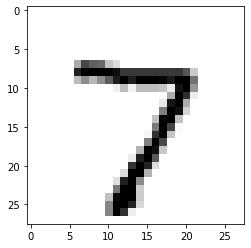

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

그렇다면 model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해 볼 수도 있겠습니다.

예측확률분포: [2.0541686e-10 2.3113635e-05 4.3403003e-03 6.8419742e-10 2.9755794e-04
 1.4735417e-09 7.5392574e-11 9.9533695e-01 2.1296842e-06 1.1197778e-10]
라벨: 2, 예측결과: 7


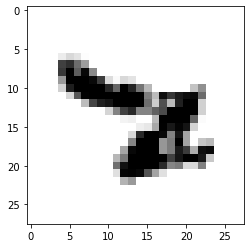

예측확률분포: [5.0026631e-07 5.7599383e-08 1.5559447e-01 8.2437397e-04 2.4556461e-11
 5.2915394e-11 6.3079858e-14 8.4353125e-01 4.7541304e-05 1.7804006e-06]
라벨: 2, 예측결과: 7


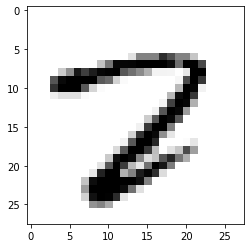

예측확률분포: [3.2654429e-05 1.4491481e-08 4.7662997e-01 1.1866051e-06 1.3304049e-07
 2.0936744e-08 1.8685904e-10 4.4448813e-03 5.1885980e-01 3.1349147e-05]
라벨: 2, 예측결과: 8


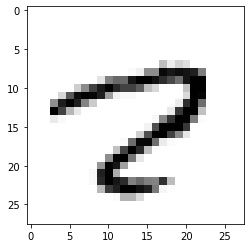

예측확률분포: [5.0026631e-07 5.7599383e-08 1.5559447e-01 8.2437397e-04 2.4556461e-11
 5.2915394e-11 6.3079858e-14 8.4353125e-01 4.7541304e-05 1.7804006e-06]
라벨: 2, 예측결과: 7


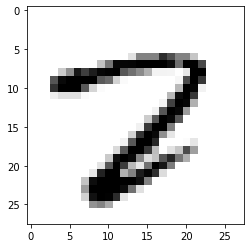

예측확률분포: [1.0084459e-03 1.0894636e-01 7.9732686e-01 7.8996737e-03 1.6102196e-05
 3.2265487e-07 1.2125590e-08 3.1741273e-02 4.0672071e-02 1.2388933e-02]
라벨: 1, 예측결과: 2


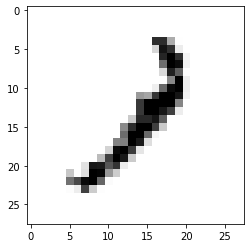

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도 낮고 매우 혼란스러워 한다는 것을 알 수 있습니다. model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나입니다.

# 5-6. 더 좋은 네트워크 만들어 보기

그러면 인식률을 99점대로 만들 수 없을까요? 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서 우리가 해볼 수 있는 것들이 있습니다. 3번째 스텝 *딥러닝 네트워크 설계하기*에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것인데요. Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 겁니다.

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_losee: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

Q7. 하이퍼파라미터를 바꾸어가면서 시험용 데이터(x_test)에 대한 인식틀을 확인해 봅시다. 최고로 높은 점수를 얻은 네트워크 모델 코드와 그 때의 시험용 데이터 인식틀을 올려주세요. 하이퍼파라미터를 바꾸면서 얻은 시험용 데이터의 최고 인식률과 최고 점수를 얻은 모델 코드를 적어주세요.

# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

**라이브러리 버전을 확인해 봅시다**

사용할 라이브러리 버전을 둘러봅시다.

In [32]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


**데이터를 준비하자**

데이터 만들기

(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요? 걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

[https://teachablemachine.withgoogle.com/](https://teachablemachine.withgoogle.com/)

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

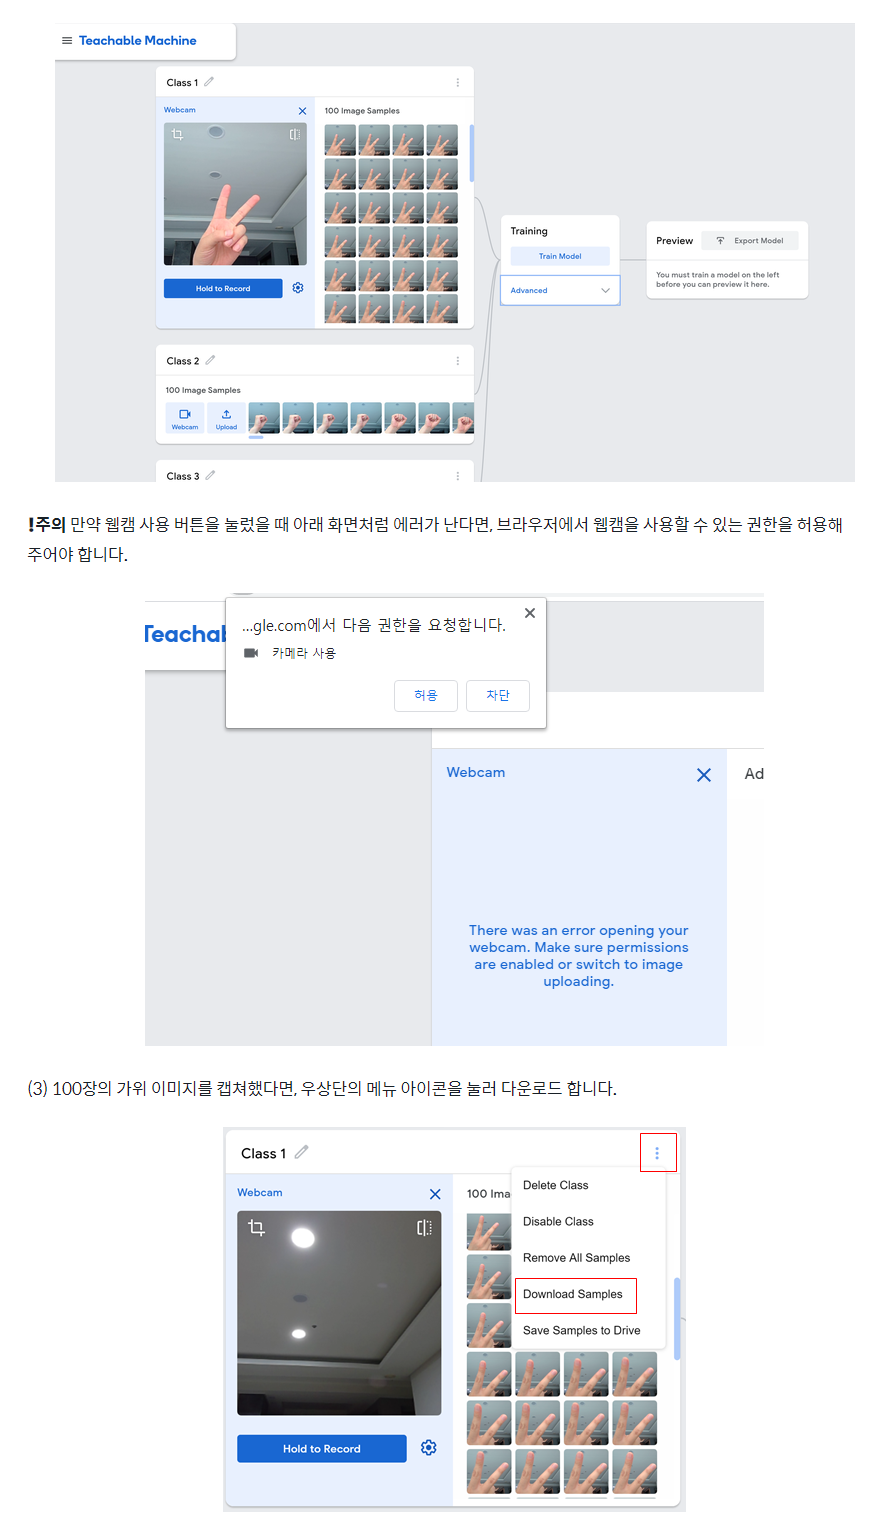

(4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해주세요. 바위와 보 이미지들에 대해서도 위 과정을 진행하세요. (각각 "rock.zip", "paper.zip" 이름으로 저장해주세요.)

**디렉토리 만들기**

이제 클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋을 올릴 차례입니다!

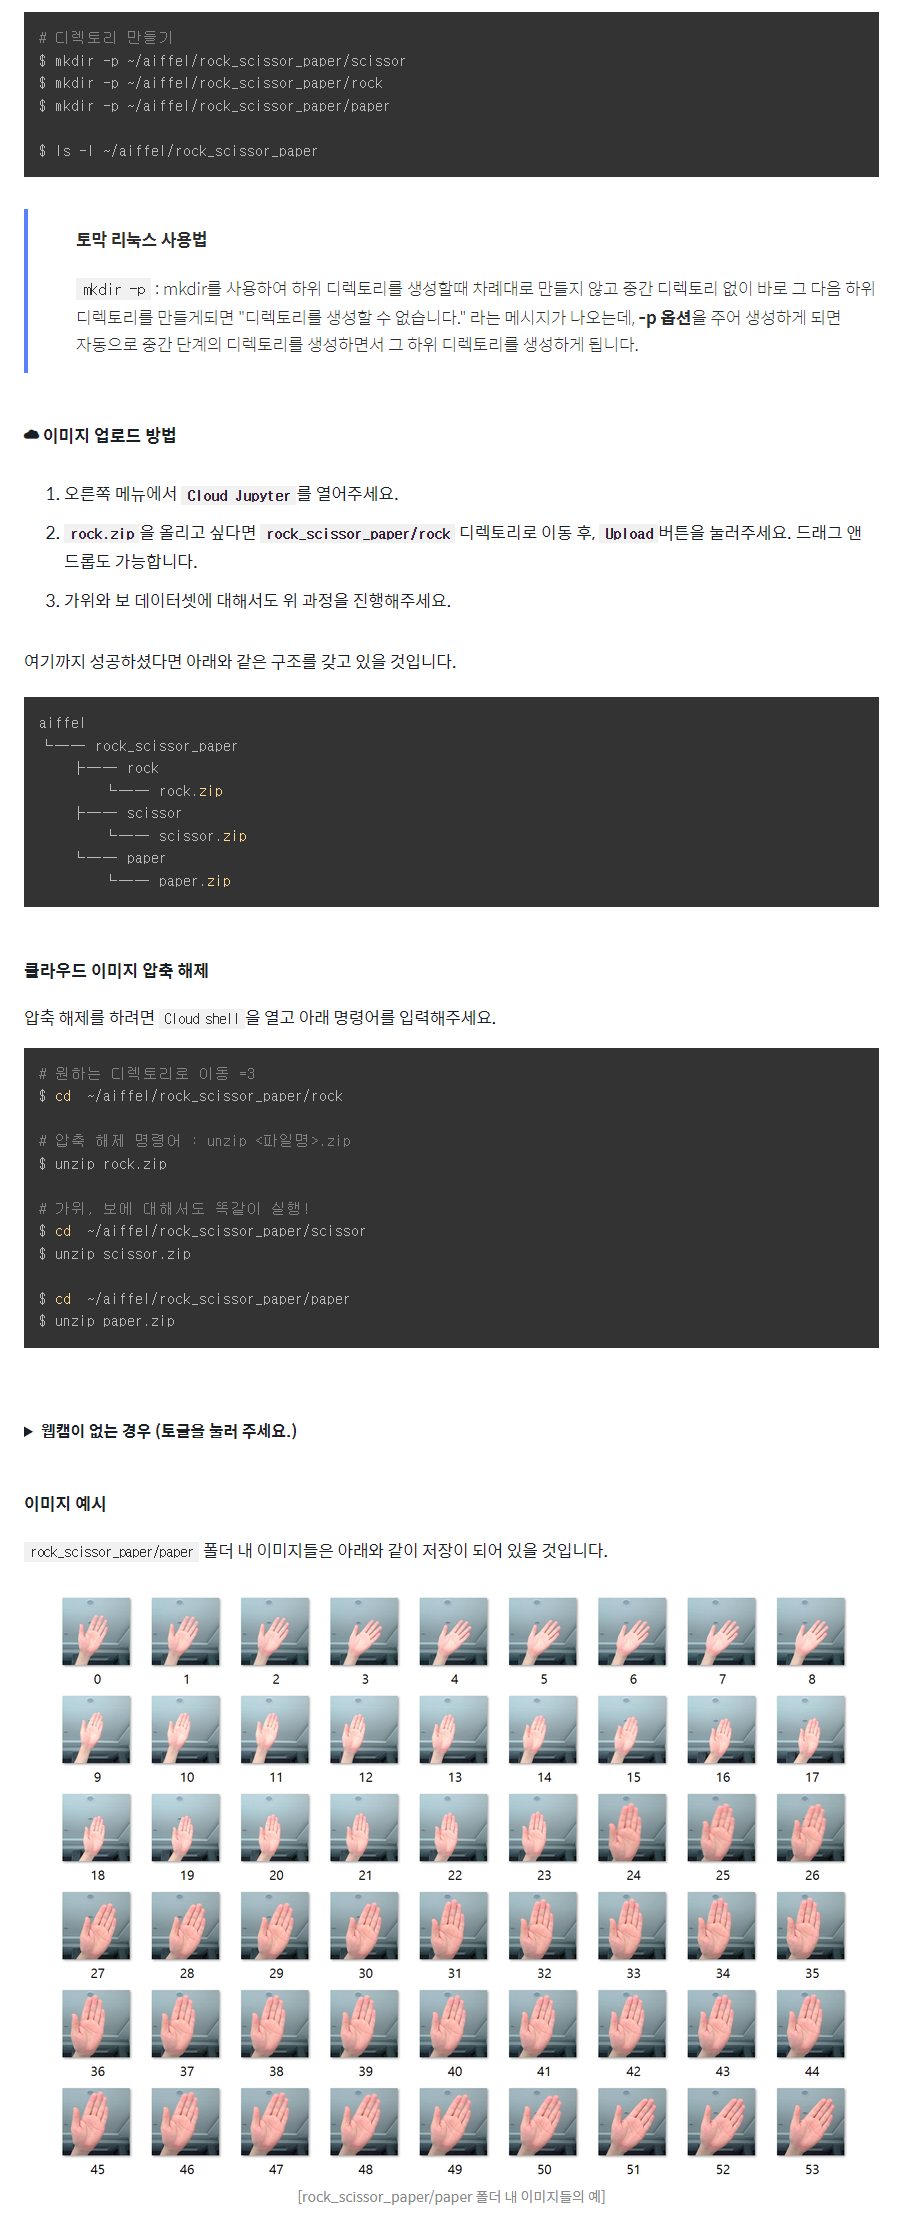

Q8. 다운로드 받은 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요. 224x224

**데이터 불러오기 + Resize 하기**

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?


In [33]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28로 바뀌었나요?

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 *mnist.load_data()*라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex.귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다. 

*load_data()* 함수는 입력으로 이미지가 있는 폴도 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위:0,바위:1,보:2로 라벨링이 될 것입니다.

In [36]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


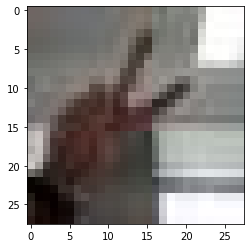

In [37]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


**딥러닝 네트워크 설계하기**

자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

[여기서부터는 국원님 코딩 참조](https://github.com/HanGuk-won/first-repository/blob/main/Ex5_hgw_1eV.ipynb)

In [39]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
(x_train, y_train) = load_data("/content/drive/MyDrive/rock_scissor_paper",300)
print("Before Reshape - x_train shape: {}".format(x_train.shape))
print("Before Reshape - y_train shape: {}".format(y_train.shape))

x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
y_train = y_train.reshape(-1, 1)

print("After Reshape - x_train_reshape shape: {}".format(x_train_reshaped.shape))
print("After Reshape - y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=10)

PIL 라이브러리 import 완료!
학습데이터(x_train)의 이미지 개수는 0 입니다.
Before Reshape - x_train shape: (300, 28, 28, 3)
Before Reshape - y_train shape: (300,)
After Reshape - x_train_reshape shape: (300, 28, 28, 3)
After Reshape - y_train shape: (300, 1)
Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 1.0930 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 1.0798 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 1.0666 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 19ms/step - loss: 1.0536 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 1.0408 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 19ms/step - loss: 1.0280 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 1.0154 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 18ms/step - loss

In [40]:
(x_test, y_test) = load_data("/content/drive/MyDrive/test",300)

print("Before Reshape - x_test shape: {}".format(x_test.shape))
print("Before Reshape - y_test shape: {}".format(y_test.shape))
x_test_norm = x_test/255.0
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)
y_test = y_test.reshape(-1, 1)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))
print("After Reshape - y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
Before Reshape - x_test shape: (300, 28, 28, 3)
Before Reshape - y_test shape: (300,)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)
After Reshape - y_test shape: (300, 1)


In [41]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9713 - accuracy: 1.0000 - 199ms/epoch - 20ms/step
test_loss: 0.9712845683097839 
test_accuracy: 1.0
